In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [12]:
df = pd.read_csv("../Dataset/SCFP2022.csv")
df.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


# For this project, we're going to focus on households that have "been turned down for credit or feared being denied credit in the past 5 years." These households are identified in the `"TURNFEAR"` column. 

In [13]:
filter  = df['TURNFEAR'] == 1
df_fear = df[filter]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (3839, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
20,5,51,7191.481109,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
21,5,52,7352.487205,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
22,5,53,7270.703541,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
23,5,54,7383.866597,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
24,5,55,7330.537669,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2


# Analysing different features of the Credit fearful group

# AGECL feature denotes Age group of the reference person
## Age groups are 
   > 1.  <35  
   
   >2.  35-44  
   
   >3.  45-54 
   
   >4.  55-64
   
   >5.  65-74
   
   >6.  Above 75


In [14]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(agecl_dict)


In [15]:
age_cl.value_counts()

35-44          936
Under 35       917
45-54          802
55-64          682
65-74          398
75 or Older    104
Name: AGECL, dtype: int64

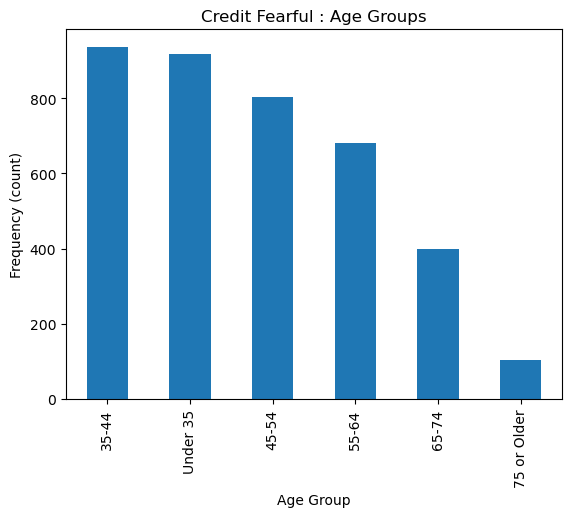

In [16]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(
    kind="bar",
    xlabel="Age Group",
    ylabel="Frequency (count)",
    title="Credit Fearful : Age Groups"
    
);
plt.savefig("../plotsandcharts/credit_fearful_agegroups")

# Exploring the Age groups of credit fearful households

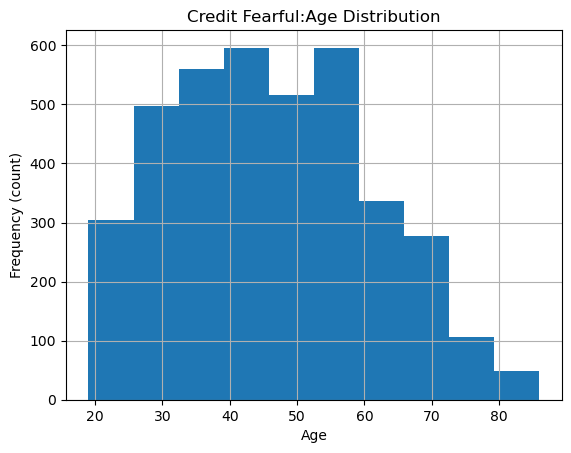

In [17]:
df_fear["AGE"].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Credit Fearful:Age Distribution");

## we can see that people in the age between 30 to 60 are more concerned of securing a loan

# Race of the Credit Fearful Group

>1 = white non-Hispanic

>2 = black / African American

>3 = Hispanic

>4 = Asian

>5 = Other

In [18]:
df_fear['RACE'].unique()

array([2, 1, 3, 5, 4], dtype=int64)

In [19]:
df_fear['RACE'].value_counts()

1    1484
2    1295
3     791
4     193
5      76
Name: RACE, dtype: int64

In [22]:
race_dict = {
    1: 'white non-Hispanic',
    2: 'black / African American',
    3: 'Hispanic',
    4: 'Asian',
    5: 'Other'
}

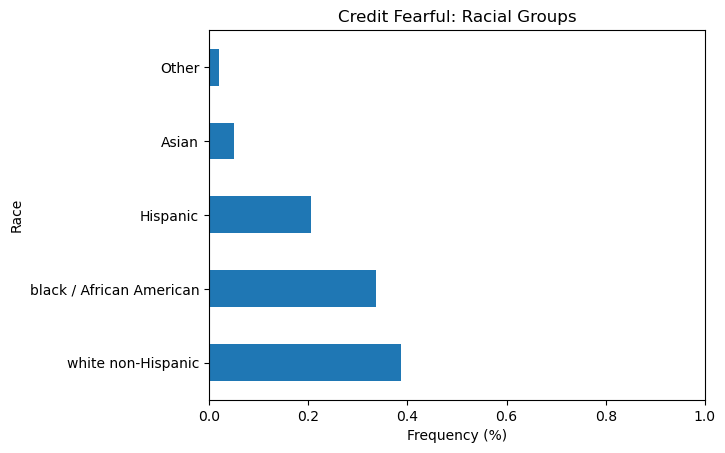

In [24]:
race = df_fear["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")

plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");
plt.savefig("../plotsandcharts/credit_fearful_racial_groups")

In [25]:
race_value_counts

white non-Hispanic          0.386559
black / African American    0.337327
Hispanic                    0.206043
Asian                       0.050274
Other                       0.019797
Name: RACE, dtype: float64

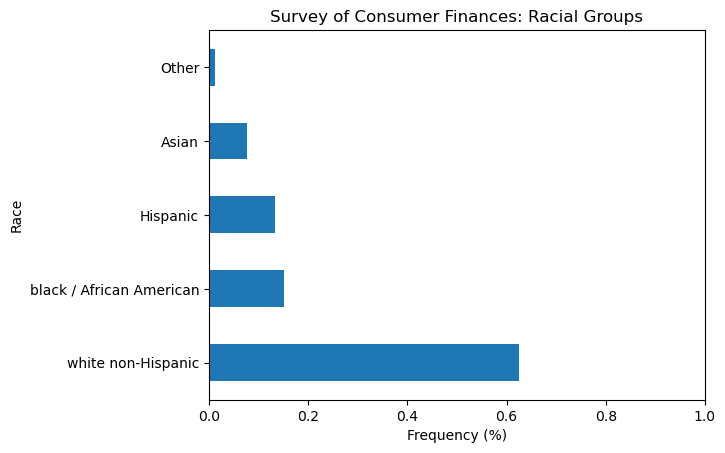

In [26]:
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")

plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Survey of Consumer Finances: Racial Groups");
plt.savefig("../plotsandcharts/Survey of Consumer Finances 2022 Racial Groups")

In [27]:
race_value_counts

white non-Hispanic          0.624548
black / African American    0.152035
Hispanic                    0.133841
Asian                       0.077693
Other                       0.011882
Name: RACE, dtype: float64

## Expolring Income Categories of both credit fearful and credit fearless groups

In [28]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)

df_inccat

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.303982
1,0,60-79.9,0.162312
2,0,40-59.9,0.144492
3,0,0-20,0.140050
4,0,21-39.9,0.139162
5,0,80-89.9,0.110002
6,1,0-20,0.340714
7,1,21-39.9,0.266476
8,1,40-59.9,0.205001
9,1,60-79.9,0.112529


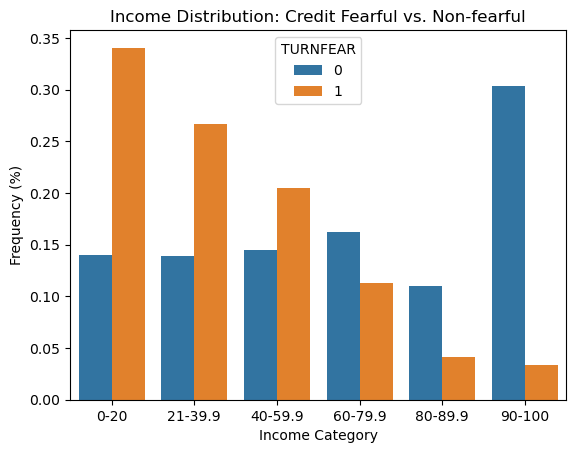

In [36]:
# Create bar chart of `df_inccat`
sns.barplot(
    
    x="INCCAT",
    y="frequency",
    hue="TURNFEAR",
    data = df_inccat,
    order= inccat_dict.values()
    
)

plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");
plt.savefig("../plotsandcharts/Income Distribution of Credit Fearful vs Nonfearful")

## We can observe that households with lesser income are more feared of being credit denied 

## finding correlation between assets and value of house in the whole survey dataset

In [37]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5617765465095476


## finding correlation between assets and value of house in the credit fearful group only

In [40]:
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.3649545427641169


### we can see that among the credit fearful group the correlation between assset and house value is less , that means households which are in credit fearful group dont have much investment in houses.

In [41]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.561777,0.706685,0.307143,0.120139
HOUSES,0.561777,1.000000,0.384699,0.251876,0.186120
INCOME,0.706685,0.384699,1.000000,0.306534,0.096549
DEBT,0.307143,0.251876,0.306534,1.000000,0.086561
EDUC,0.120139,0.186120,0.096549,0.086561,1.000000


In [42]:
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.364955,0.893282,0.477171,0.110659
HOUSES,0.364955,1.000000,0.314501,0.676984,0.195174
INCOME,0.893282,0.314501,1.000000,0.456622,0.108845
DEBT,0.477171,0.676984,0.456622,1.000000,0.182570
EDUC,0.110659,0.195174,0.108845,0.182570,1.000000


## we can see that in the credit fearless group the value of asset is less correlated to income than in the credit fearful group ,means that the total asset of the credit fearful household is more driven by income rather than other source of money,also we can onbserve in the credit fearful group the value of debt is more correlated to value of houses, that means they have more debt and this debt may be taken keeping house property or values as security or they may have taken their homes on loan itself from some other party

# Analysing the Education Levels of Credit Fearful and non Credit Fearful groups

# Highest completed grade of the Person 
## The values are as follows
    -1      LESS THAN 1ST GRADE
	1	1ST, 2ND, 3RD, OR 4TH GRADE
	2	5TH OR 6TH GRADE
	3	7TH OR 8TH GRADE
	4	9TH GRADE
    5	10TH GRADE
	6	11TH GRADE
	7	12TH GRADE, NO DIPLOMA
	8	HIGH SCHOOL GRADUATE - HIGH SCHOOL DIPLOMA OR EQUIVALENT
	9	SOME COLLEGE BUT NO DEGREE
	10	ASSOCIATE DEGREE IN COLLEGE - OCCUPATION/VOCATION PROGRAM
	11	ASSOCIATE DEGREE IN COLLEGE - ACADEMIC PROGRAM
    12	BACHELOR'S DEGREE (FOR EXAMPLE: BA, AB, BS)
    13	MASTER'S DEGREE
	14	DOCTORATE OR PROFESSIONAL SCHOOL DEGREE

In [44]:
df_educ = (
    
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
df_educ

,TURNFEAR,EDUC,frequency
0,0,12,0.278689
1,0,8,0.174383
2,0,13,0.158967
3,0,9,0.111727
4,0,14,0.108539
5,0,10,0.049122
6,0,11,0.041283
7,0,7,0.016722
8,0,6,0.012176
9,0,4,0.010974


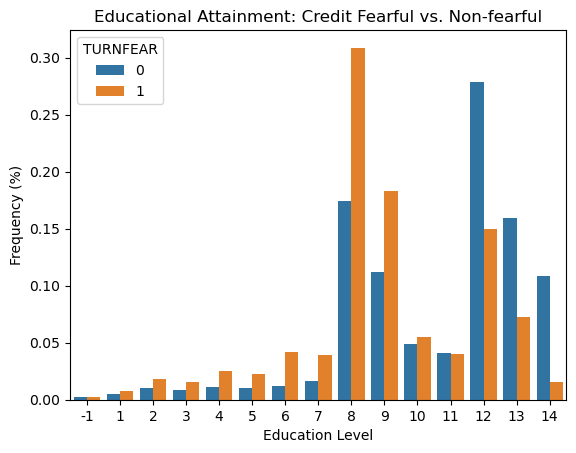

In [46]:
# Create bar chart of `df_educ`
sns.barplot(
    x="EDUC",
    y="frequency",
    hue="TURNFEAR",
    data= df_educ
)

plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");
plt.savefig("../plotsandcharts/Educational Qualification of Credit Fearful and Credit Fearless groups")

## Marital Status of CREdit Fearful and credit fearless group
### denoted by MARRIED in the dataset

### 1 represents married/living with partner
### 2 represents neither married nor living with partner

In [48]:
df['MARRIED'].head()

0    2
1    2
2    2
3    2
4    2
Name: MARRIED, dtype: int64

In [50]:
marriage_dict  = {
    1:"Married",
    2:"Unmarried"
}
marital_status = df['MARRIED'].replace(marriage_dict)
marital_status.value_counts()

Married      14525
Unmarried     8450
Name: MARRIED, dtype: int64

In [51]:
marital_status.value_counts(normalize=True)

Married      0.632209
Unmarried    0.367791
Name: MARRIED, dtype: float64

In [52]:
## Around 63 % of people are married in the whole dataset

In [53]:
marital_status = df_fear['MARRIED'].replace(marriage_dict)
marital_status.value_counts(normalize=True)

Unmarried    0.552748
Married      0.447252
Name: MARRIED, dtype: float64

In [65]:
df_fear['MARRIED'].replace(marriage_dict).value_counts()

Unmarried    2122
Married      1717
Name: MARRIED, dtype: int64

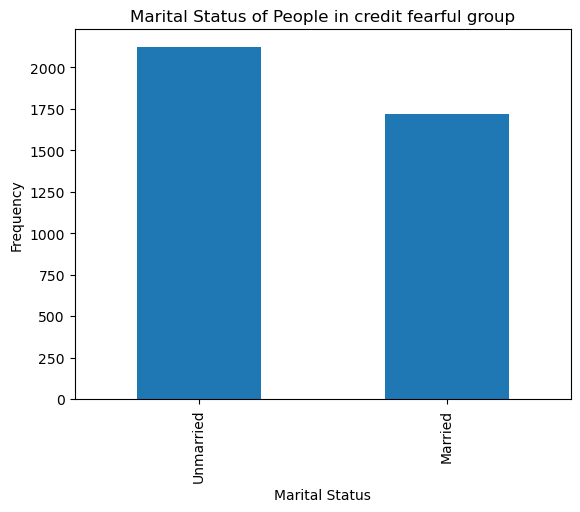

In [63]:
df_fear['MARRIED'].replace(marriage_dict).value_counts().plot(kind = "bar")
plt.title("Marital Status of People in credit fearful group")
plt.ylabel("Frequency")
plt.xlabel("Marital Status")
plt.savefig("../plotsandcharts/Marital Status of People in credit fearful group")

## we can see that unmarried people are more in the credit fearful group

# Analysing Debts of the Households

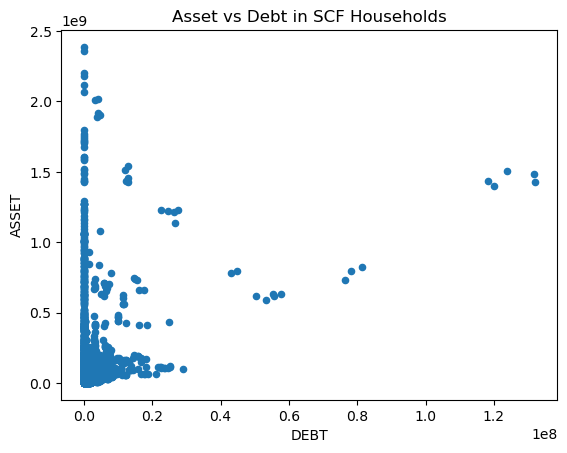

In [71]:
df.plot.scatter(x="DEBT",y="ASSET")
plt.title("Asset vs Debt in SCF Households");
plt.savefig("../plotsandcharts/Asset vs Debt in SCF Households")

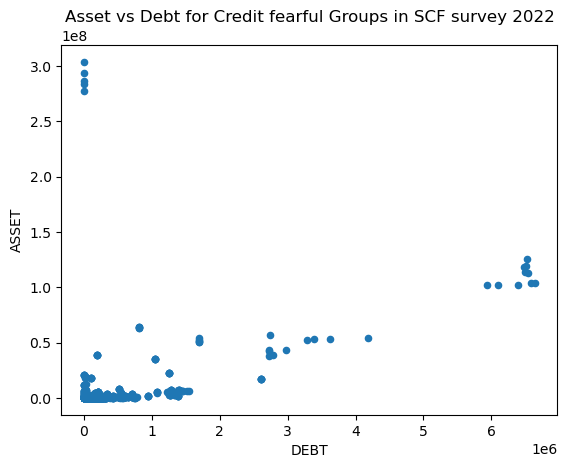

In [72]:
df_fear.plot.scatter(x="DEBT",y="ASSET");
plt.title("Asset vs Debt for Credit fearful Groups in SCF survey 2022");
plt.savefig("../plotsandcharts/Asset vs Debt for Credit fearful Groups in SCF survey 2022")

## We can observe the clusters formed in the credit fearful group ,
## some imp. observations are -----------
### some households have very high debts but dont have high value of assets
### some have very low debts but have very high value of assets (these may be the rich peoples)
### some have medium level of debts but have less assets
### some have less debts and also less assets


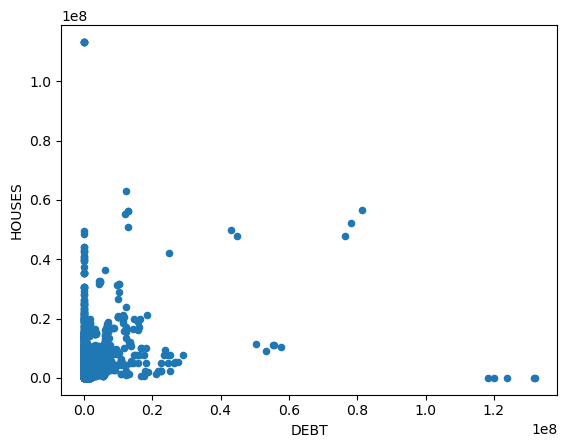

In [74]:
df.plot.scatter(x="DEBT",y="HOUSES");

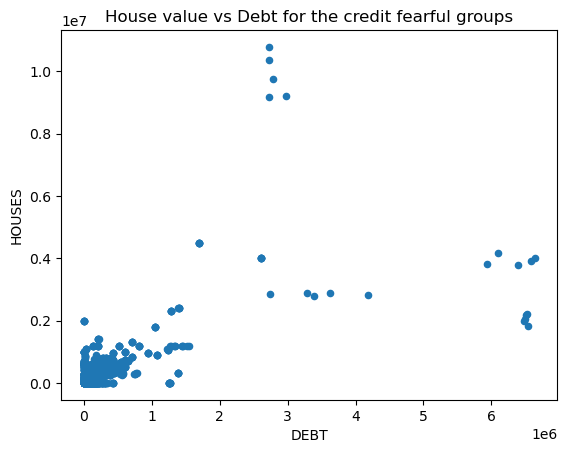

In [77]:
df_fear.plot.scatter(x= "DEBT", y = "HOUSES");
plt.title("House value vs Debt for the credit fearful groups")
plt.savefig("../plotsandcharts/House value vs Debt for the credit fearful groups")

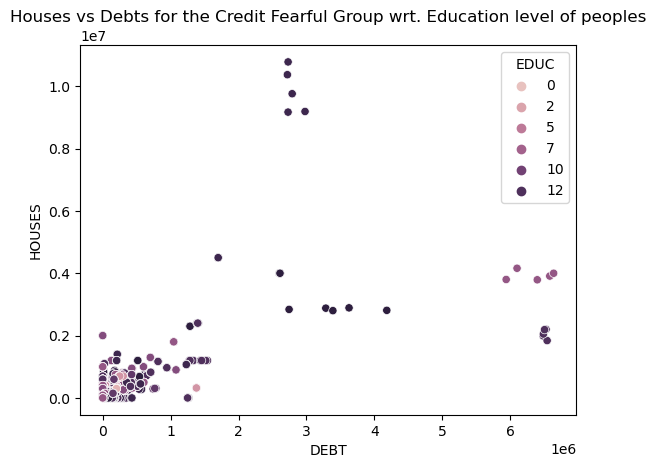

In [86]:
sns.scatterplot(data  = df_fear,y = 'HOUSES', x = 'DEBT', hue = 'EDUC');
plt.title("Houses vs Debts for the Credit Fearful Group wrt. Education level of peoples");
plt.savefig("../plotsandcharts/Houses vs Debts for the Credit Fearful Group wrt Education level of peoples")